In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt

The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `sin(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

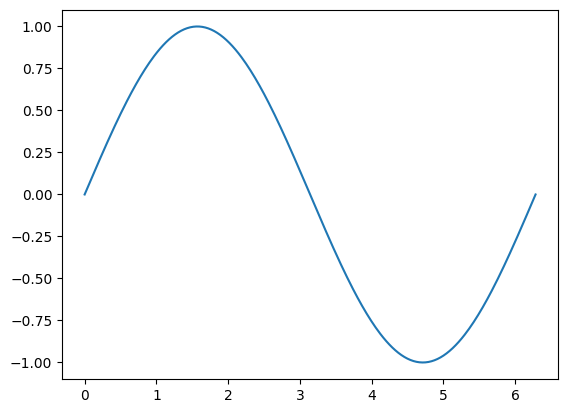

In [ ]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.sin(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

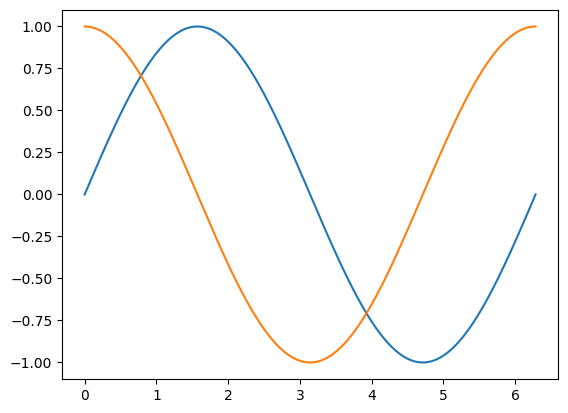

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, np.cos(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.


## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

Text(0.5, 1.0, 'Graphs if cos(x) and sin()')

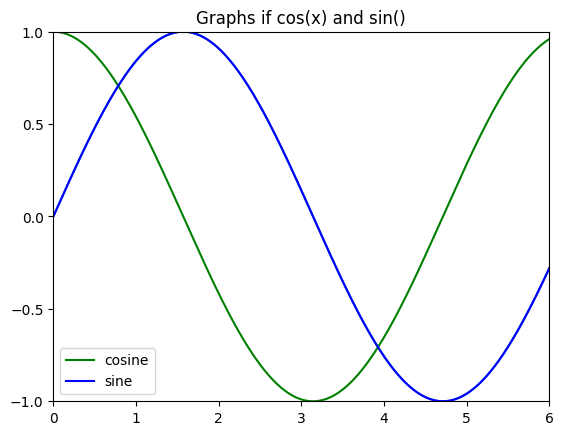

In [ ]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
#FIGURE OUT THE LIMITS THEY LOOK THE SAME AND I DIDNT CHANGE ANYTHING

plt.plot(xs, ys)
plt.xlim(0,6)
plt.ylim(-1,1)
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.plot(xs, np.cos(xs),color = "green", label = "cosine")
plt.plot(xs, np.sin(xs),color = "blue", label = "sine")
plt.legend(loc = "lower left")
plt.title("Graphs if cos(x) and sin()")

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C.

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import os
# import file_path
# file_path = os.path.abspath('content/gdrive/MyDrive/HW2_fall23/bikeshare.csv')




bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Q1.1 (10%):
Explore the `bike_trips` dataframe to answer the following questions.


What time range is represented here?
What was the maximum registration (use the "registered" column) on a SINGLE DAY

Write code in the cell below to perform your exploration.

In [ ]:
# your code here
startDate =  bike_trips.loc[:,"dteday"].min()

endDate = bike_trips.loc[:,"dteday"].max()
print("Beginning Date and Time",startDate)
print("Ending Date and Time",endDate)
print(endDate- startDate)


maxReg = bike_trips.loc[:,"registered"].max()
maxDate = bike_trips[bike_trips["registered"] == bike_trips["registered"].max()]["dteday"].iloc[0]
print("Max Registered", maxReg, "on" , maxDate)


Beginning Date and Time 2011-01-01 00:00:00
Ending Date and Time 2012-12-31 23:00:00
730 days 23:00:00
Max Registered 886 on 2012-09-12 18:00:00


## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<Axes: xlabel='dteday'>

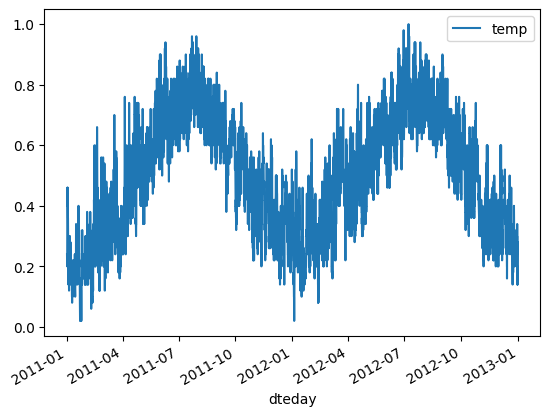

In [ ]:
# This plot shows the temperature at each data point
bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<Axes: xlabel='dteday', ylabel='temp'>

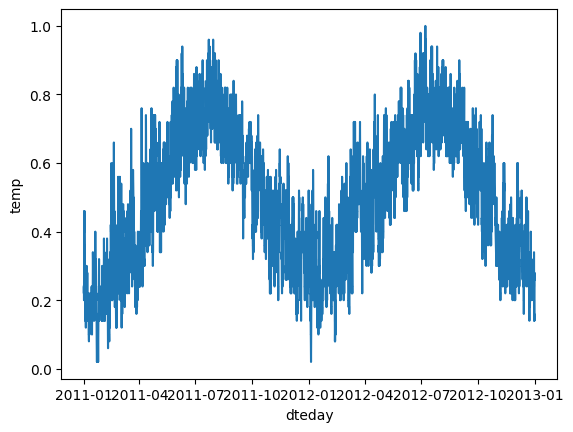

In [ ]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips)

## Q1.2 (10%):

Use seaborn's `barplot` function to make a bar chart showing
1. the average number of registered riders on each day of the week over the
   entire `bike_trips` dataset.
2. the average number of casual riders on each day of the week over the
   entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html
.

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

<Axes: xlabel='Weekday', ylabel='Average'>

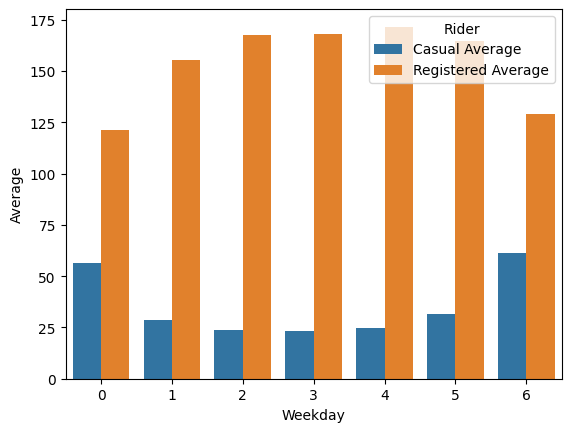

In [ ]:


casualAvg = bike_trips.groupby(bike_trips['weekday'])["casual"].mean()
registerAvg  = bike_trips.groupby(bike_trips['weekday'])["registered"].mean()


avg_data = pd.DataFrame({
    "Weekday": casualAvg.index,
    "Casual Average": casualAvg.values,
    "Registered Average": registerAvg.values
})


avg_data = avg_data.melt(id_vars="Weekday", var_name="Rider", value_name="Average")
sns.barplot(data=avg_data, x="Weekday", y="Average", hue="Rider")


# sns.barplot(x = casualAvg.index,y = casualAvg.values, label = "Casual Average")
# sns.barplot(x = registerAvg.index,y = registerAvg.values, label = "Registered Average")




There is a higher perday average among registered bikers compared to casual riders. Inferring from the averages there are more people who are registered riders than casual riders. I woould make the assumption that there are almost twice as many more registered riders than casual riders Furthmore for casual riders theyre higher averages on days 0 and 6 compared to other days.


## Q1.3 (10%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like **q5.png**.


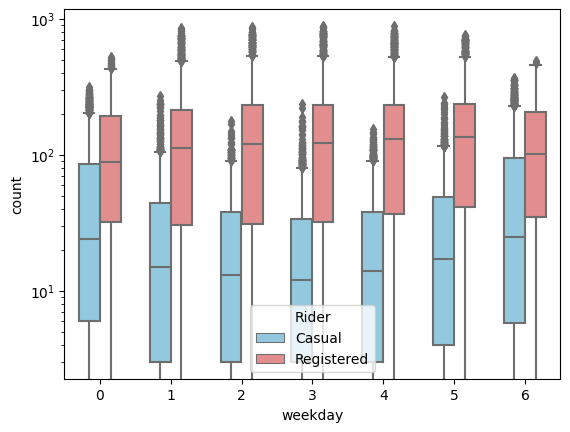

In [ ]:
# # your code here

# THERE HAS TO BE A BETTER WAY TO DO THIS

bike_trips['Rider'] = 'Casual'
bike_trips_casual = bike_trips[['weekday', 'Rider', 'casual']].rename(columns={'casual': 'count'})

bike_trips['Rider'] = 'Registered'
bike_trips_registered = bike_trips[['weekday', 'Rider', 'registered']].rename(columns={'registered': 'count'})

bike_trips_combined = pd.concat([bike_trips_casual, bike_trips_registered])

ax = sns.boxplot(x='weekday', y='count', hue='Rider', data=bike_trips_combined, palette=['skyblue', 'lightcoral'], width=0.6)

ax.set_yscale('log')




## Q1.4 (10%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like **q1-5.png**.



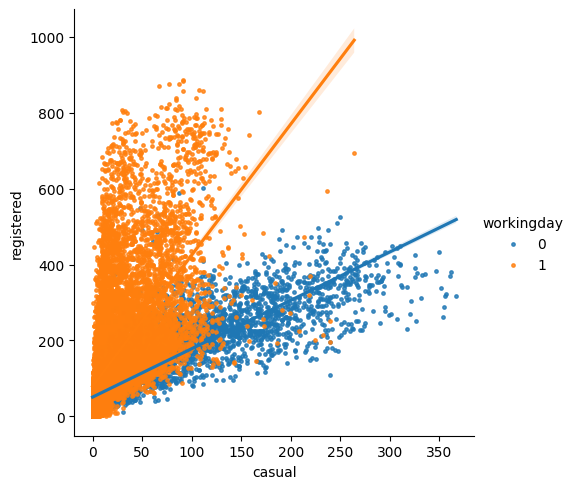

In [ ]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

# your code here



ax = sns.lmplot(x = 'casual',y = 'registered', data = bike_trips,hue = "workingday",scatter_kws={'s': 6},legend = True)


# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object

## Want to learn more?

Check out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

The differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media (45%)

This part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society.

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your two most significant findings (_Q2.2, Q2.3). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For each visualization in these two findings, create an alternate visualization (Q2.2.2, Q.2.3.2). For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the  bar plot visualization **q2-1.png**.



The file you will work with is `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices



## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

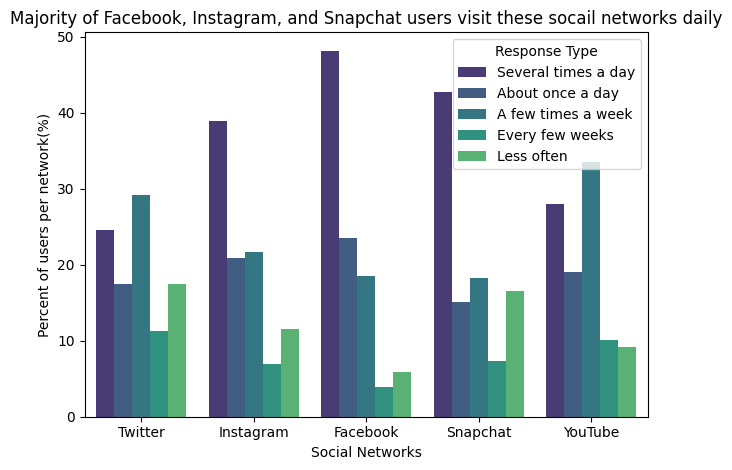

In [ ]:
# # [your code here]


# # web1a,Twitter
# # web1b,Instagram
# # web1c,Facebook
# # web1d,Snapchat
# # web1e,YouTube

# # sns2a,      1	Several times a day
# # sns2b,      2	About once a day
# # sns2c,      3	A few times a week
# # sns2d,      4	Every few weeks
# # sns2e       5	Less often

legend_labels = {
    1: 'Several times a day',
    2: 'About once a day',
    3: 'A few times a week',
    4: 'Every few weeks',
    5: 'Less often'
}


social_media = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')
important_columns = social_media[['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']]


social_media['sns2a'].replace(' ', np.nan, inplace=True)
social_media['sns2b'].replace(' ', np.nan, inplace=True)
social_media['sns2c'].replace(' ', np.nan, inplace=True)
social_media['sns2d'].replace(' ', np.nan, inplace=True)
social_media['sns2e'].replace(' ', np.nan, inplace=True)


social_media['sns2a'].replace('8', np.nan, inplace=True)
social_media['sns2b'].replace('8', np.nan, inplace=True)
social_media['sns2c'].replace('8', np.nan, inplace=True)
social_media['sns2d'].replace('8', np.nan, inplace=True)
social_media['sns2e'].replace('8', np.nan, inplace=True)

social_media['sns2a'].replace('9', np.nan, inplace=True)
social_media['sns2b'].replace('9', np.nan, inplace=True)
social_media['sns2c'].replace('9', np.nan, inplace=True)
social_media['sns2d'].replace('9', np.nan, inplace=True)
social_media['sns2e'].replace('9', np.nan, inplace=True)

platforms = ['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']
percentage_data = social_media[platforms].apply(pd.value_counts, normalize=True) * 100

percentage_data.reset_index(inplace=True)
melted_data = pd.melt(percentage_data, id_vars='index', var_name='Social Media Platform', value_name='Percentage')
melted_data.rename(columns={'index': 'Response'}, inplace=True)



sns.barplot(data=melted_data, x='Social Media Platform', y='Percentage', hue='Response')
sns.set_palette("viridis")

plt.xlabel('Social Networks')
plt.ylabel('Percent of users per network(%)')
plt.title('Majority of Facebook, Instagram, and Snapchat users visit these socail networks daily')

plt.gca().set_xticklabels(['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube'])

legend = plt.legend(title='Response Type')
for label in legend_labels:
    legend.get_texts()[label-1].set_text(legend_labels[label])



plt.tight_layout()
plt.show()

# #HINTS
# # 1) Read your dataframe with pandas
# # 2) Identify what colums are used for plot above
# # 3) Filter required rows and columns necessary for plotting above figure
# # 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# # i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
# # 5) Once dataframe is in wide format, filter individuals who responded to the survey
# # 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
# # 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
# # 8) Add descriptive xlabel, ylabel, and title
# # 9) Customize legend if necessary





## Q2.1 (10%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [ ]:
# Run descriptive statistics on the data and develop ideas on what to explore
# your code here


# # Data Overview
print(social_media.head())

# Summary Statistics
print("Summary statistics:\n", social_media.describe())

# Select the columns for which you want to print unique values
selected_columns = ['age', 'intfreq', 'sex', 'educ2', 'racem1', 'marital', 'party', 'inc', 'emplnw']
print("These have been deemed the important ones by us")
# Loop through the selected columns and print unique values
for column in selected_columns:
    unique_values = social_media[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


   respid  sample  comp  int_date  lang  cregion  state  density  sfips usr  \
0       4       1     1    190108     1        3     37        2  37069   S   
1       7       1     1    190108     1        2     39        3  39025   S   
2       9       1     1    190108     1        1     34        4  34025   S   
3      10       1     1    190108     1        2     18        3  18039   S   
4      11       1     1    190114     1        2     26        2  26027   S   

   ... inc  party  partyln  hh1 hh3  ql1  ql1a qc1    weight cellweight  
0  ...   3      2             2   2    1            1.143827             
1  ...   8      1             2   2    1            0.611493             
2  ...   7      1             2   2    1            0.424797             
3  ...   6      3        2    2   2    1            1.323562             
4  ...   7      3        1    2   2    1            0.639452             

[5 rows x 74 columns]
Summary statistics:
               respid       sample    

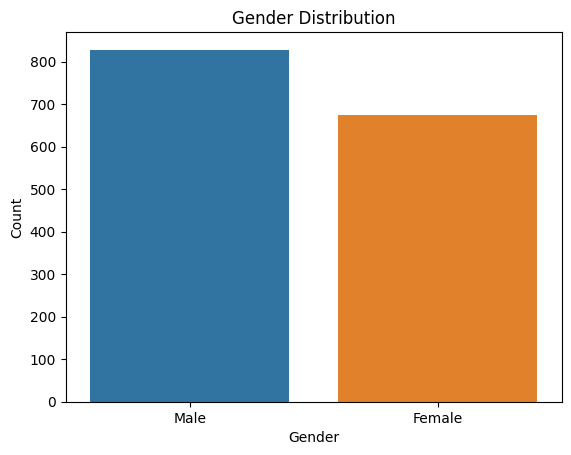

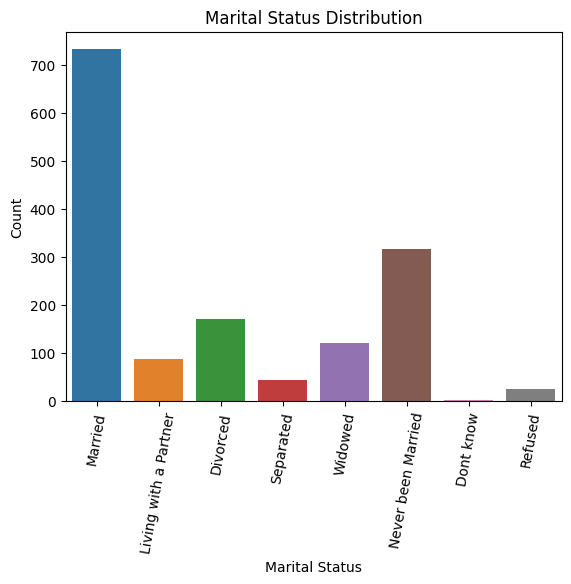

In [ ]:
# Create one or more visualizations
# your code here



# Gender Distribution
gender_counts = social_media['sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xticks([0,1], ['Male', 'Female'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



# Marital Status Distribution
marital_counts = social_media['marital'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.xticks([0,1,2,3,4,5,6,7], ['Married', 'Living with a Partner','Divorced','Separated','Widowed','Never been Married','Dont know','Refused'],rotation=80);
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

The distribution of gender is relatively balanced, with a slightly higher proportion of males than females. The distribution of marital status is also relatively balanced, with a slightly higher proportion of married people than single people.

Overall, the descriptive statistics analysis suggests that the survey data is relatively evenly distributed across both gender and marital status categories. However, there are some small differences in the distribution of these variables, with slightly more males than females and slightly more married people than single people.

Additionally, the data suggests that the distribution of both gender and marital status is relatively close to the mean, with most respondents identifying as either male or female and either married or single.


## Q2.2 (10%+5%):
### Q2.2.1 (Distribution of Age)

(A histogram showing the distribution of internet usage frequency by age group.
The histogram shows that internet usage frequency is highest among people under the age of 70 and decreases as the age of the indivudal increases. We see that the data spikes up once we to the 50's. So while we'd expect internet usage to be highest among young people it is not. It also ultimate increases once we reach 50+, With the highest usage coming from people in between 50-60. This may be because they are retired and have more free time.)

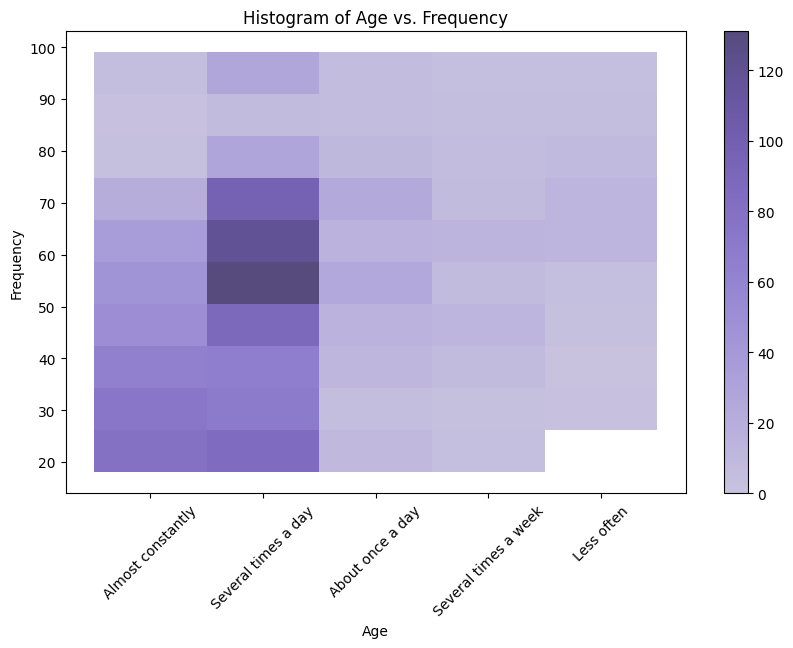

In [ ]:
# your Q2.2.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here.


social_media['intfreq'].replace(' ', np.nan, inplace=True)
social_media['intfreq'].replace('8', np.nan, inplace=True)
social_media['intfreq'].replace('9', np.nan, inplace=True)
social_media.sort_values(by='intfreq', inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=social_media, x='intfreq', y='age', bins=10, cbar=True)
plt.title('Histogram of Age vs. Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3, 4], ['Almost constantly', 'Several times a day', 'About once a day', 'Several times a week', 'Less often'], rotation=45)
plt.show()




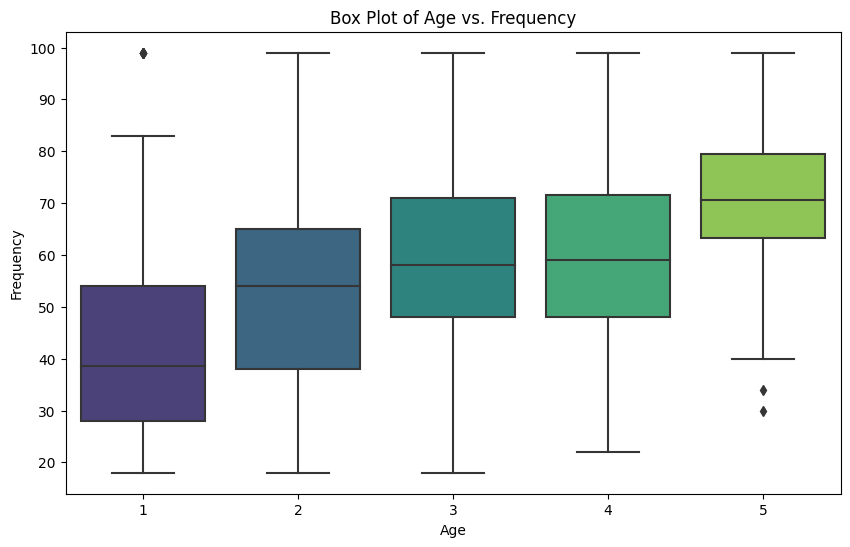

In [ ]:
# # your Q2.2.2 visualization code should be included here

social_media['intfreq'].replace(' ', np.nan, inplace=True)
social_media['intfreq'].replace('8', np.nan, inplace=True)
social_media['intfreq'].replace('9', np.nan, inplace=True)
social_media.sort_values(by='intfreq', inplace=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=social_media, x='intfreq', y='age', palette='viridis')
plt.title('Box Plot of Age vs. Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



## Q2.3 (10%+5%):
### Q2.3.1 (_Internet Usage Frequency_)

(_This scatter plot shows the relationship between teh respondents age(X-Axis) and the number of books they've read in the past twelve mothns(Y-Axis)The graph suggests that the older the respondent is the more books they read. However, the average amount of books read is quite low regardless of age. _)

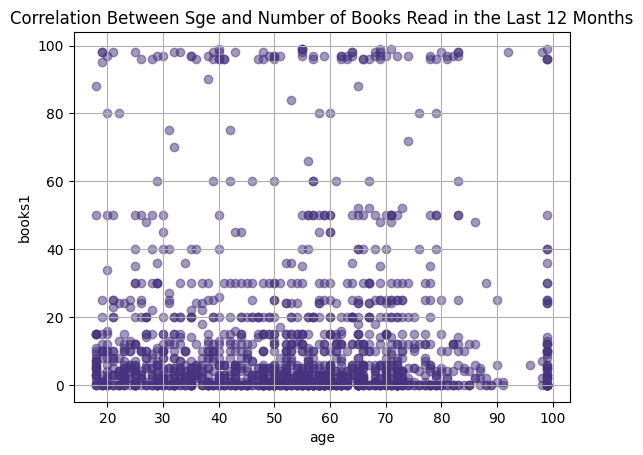

In [ ]:
# your Q2.3.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here

social_media['books1'].replace('98', np.nan, inplace=True)
social_media['books1'].replace('99', np.nan, inplace=True)



column1 = 'age'
column2 = 'books1'

correlation_coeff = social_media[column1].corr(social_media[column2])

plt.scatter(social_media[column1], social_media[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title('Correlation Between Sge and Number of Books Read in the Last 12 Months')
plt.grid(True)
plt.show()

### Q2.3.2 Alternate visualization

Now use your results and visualization from Q2.3.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

<Figure size 1500x1000 with 0 Axes>

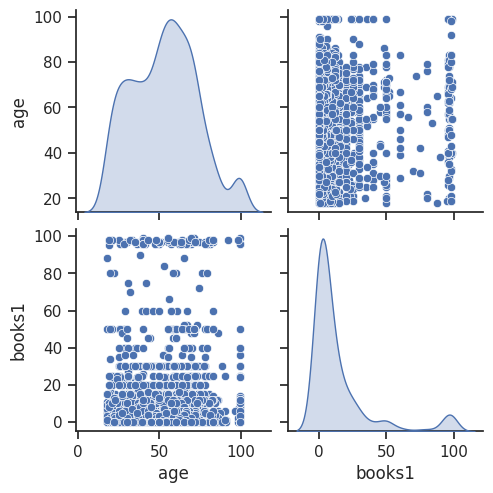

In [ ]:
# your Q2.3.2 visualization code should be included here

# Create a line chart for 'age' and 'books1'
plt.figure(figsize=(15, 10))
columns = ['age', 'books1']  # Replace with the columns you want to include

# Create the scatterplot matrix
sns.set(style="ticks")
sns.pairplot(social_media[columns], diag_kind='kde')
plt.show()

# Part 3: Error and loss functions (10%)

The last part is about implementing and explore some concepts that we have seen in the class.

## Implement the MSE and MAE
a) Implement MSE (mean Sqaured Error) by your own. Compare with the built-in function (from sklearn.metrics import mean_squared_error) by generating a random sequence of 10 numbers.
b) Implement MAE (mean absolute error) by your own. Compare with the built-in function (from sklearn.metrics import mean_absolute_error) by generating a random sequence of 10 numbers.


In [ ]:
# your code here - MSE
def mse(y_true, y_pred):
  #Calculates the mean squared error
  mse = np.mean((y_true - y_pred)**2)
  return mse


In [ ]:
from sklearn.metrics import mean_squared_error
# Generate a random sequence of 10 numbers
y_true = np.random.rand(10)
y_pred = np.random.rand(10)

# Calculate MSE using our implementation
mse_ours = mse(y_true, y_pred)

# Calculate MSE using the built-in function
mse_sklearn = mean_squared_error(y_true, y_pred)

# Print the results
print("MSE using our implementation:", mse_ours)
print("MSE using the built-in function:", mse_sklearn)

MSE using our implementation: 0.09922969143853552
MSE using the built-in function: 0.09922969143853552


In [ ]:
# your code here - MAE
def mae(y_true, y_pred):
  #Calculates the mean absolute error
  mae = np.mean(np.abs(y_true - y_pred))
  return mae

In [ ]:
from sklearn.metrics import mean_absolute_error
# Generate a random sequence of 10 numbers
y_true = np.random.rand(10)
y_pred = np.random.rand(10)

# Calculate MAE using our implementation
mae_ours = mae(y_true, y_pred)

# Calculate MAE using the built-in function
mae_sklearn = mean_absolute_error(y_true, y_pred)

# Print the results
print("MAE using our implementation:", mae_ours)
print("MAE using the built-in function:", mae_sklearn)

MAE using our implementation: 0.3161216915622768
MAE using the built-in function: 0.3161216915622768


# Extra Credit (10%)
Explain what the Huber loss is and how it differs from traditional loss functions like Mean Squared Error (MSE). What role does the parameter
 δ play in the Huber loss function? Provide an example scenario where using Huber loss might be beneficial compared to using MSE.

(Huber loss is less sensitive to extreme outliers and can be adjusted by using parameter delta to control sensitivity. In a sitatation with a lot of outliers Huber loss produces more accurate results.

EX: Suppose theres a model that will predict student test scores based on various parameters like study hours, attendance, GPA.There might be a few outlier cases where students perform better or worse than the average student. IE they do not study attend class but still perform well in the class or a student who attends class and studies and still does bad in class. If we use Mean Squared Error (MSE) as the loss function, it could overly penalize the model for these extreme outliers, potentially leading to a less accurate model.

Using the Huber loss with an appropriate δ value will allow the model to give more balanced attention to the majority of students performance while being less influenced by the outliers,like high or low scores. This would result in a better model for predicting test scores.)

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!